In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## **1. EDA**

In [4]:
train = pd.read_csv('train.csv')
train

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


* 데이터프레임 상 모든 데이터는 '매니저를 지칭하는 코드'로써, 각각의 고유한 값이 있어 명목형 데이터로 확인됨
* 별도의 encoding이 필요

In [5]:
test = pd.read_csv('test.csv')
test

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [23]:
train.duplicated().sum()

0

In [25]:
test.duplicated().sum()

0

In [7]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [8]:
test.describe()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.000000,58921.00000,58921.000000
mean,29461.000000,39383.739482,26691.645050,117028.638041,118316.334091,118858.006721,126358.019993,170455.861425,179278.05896,119707.754264
std,17009.171942,33717.397122,35110.244281,10805.446548,4284.678750,17916.179109,32068.294507,69684.692799,99639.96530,5326.979178
min,1.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.00000,117880.000000
25%,14731.000000,18418.000000,4663.000000,117961.000000,118096.000000,118378.000000,118259.000000,117913.000000,118331.00000,118055.000000
50%,29461.000000,33248.000000,14789.000000,117961.000000,118300.000000,118910.000000,118636.000000,129282.000000,118704.00000,118570.000000
75%,44191.000000,45481.000000,46512.000000,117961.000000,118386.000000,120410.000000,120006.000000,234813.000000,290919.00000,119353.000000
max,58921.000000,312136.000000,311779.000000,311178.000000,194897.000000,277693.000000,311867.000000,311867.000000,308574.00000,270691.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [10]:
count = train[train['RESOURCE'] == 0].count().sum()
result = (train[train['RESOURCE'] == 0].count().sum())/(train['RESOURCE'].count().sum()) * 100

print(f'RESOURCE 컬럼 내 0 값의 수 : {count}\n' f'RESOURCE 컬럼 내 0 값의 비율 : {result:.3f} %')

RESOURCE 컬럼 내 0 값의 수 : 130
RESOURCE 컬럼 내 0 값의 비율 : 0.397 %


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [12]:
count = test[test['RESOURCE'] == 0].count().sum()
result = (test[test['RESOURCE'] == 0].count().sum())/(test['RESOURCE'].count().sum()) * 100
print(f'RESOURCE 컬럼 내 0 값의 수 : {count}\n' f'RESOURCE 컬럼 내 0 값의 비율 : {result:.3f} %')

RESOURCE 컬럼 내 0 값의 수 : 250
RESOURCE 컬럼 내 0 값의 비율 : 0.424 %


* train 및 test 데이터 둘다 결측치는 없으며, 
* 그나마 의심스러운 데이터는 RESOURCE의 '0'값이나 비중이 작고 데이터 인지 아닌지 정확한 확인이 불가하므로 그냥 둠

<Axes: >

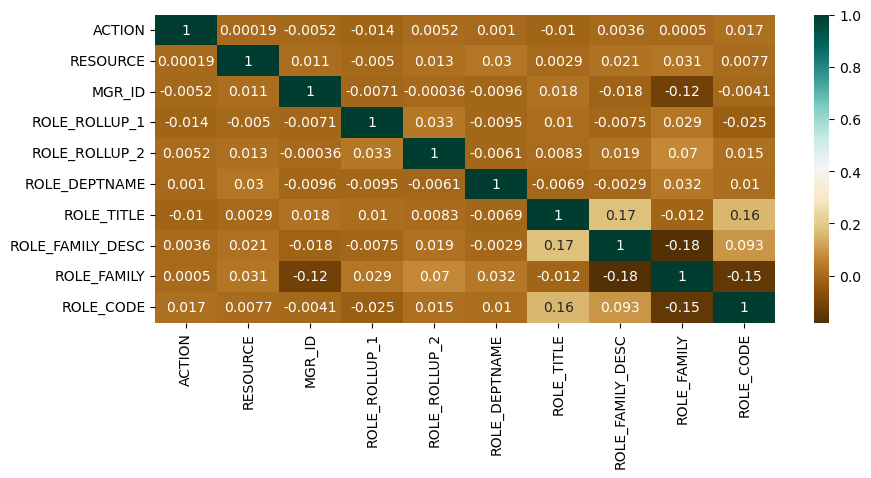

In [13]:
plt.figure(figsize=(10,4))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='BrBG')

* 분류로 처리해야함에도 상관 분석을 한 이유는 각 숫자 별 **중복되는 의미가 있어** 비슷한 패턴으로 적용되었으면 상관관계가 높지 않을까 싶어 분석해봄
    * 열이 너무 많으면 과적합의 우려가 있어 최대한 삭제할 수 있는 열을 찾아보려고 확인함  
* 모든 데이터들의 상관관계가 높지 않으나, 
* 그 중 그나마 상관계수가 높은 ['ROLE_FAMILY', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_CODE'] 컬럼을 가지고 별도의 그래프로 마지막 확인

In [14]:
train_1 = train.astype('category').copy()

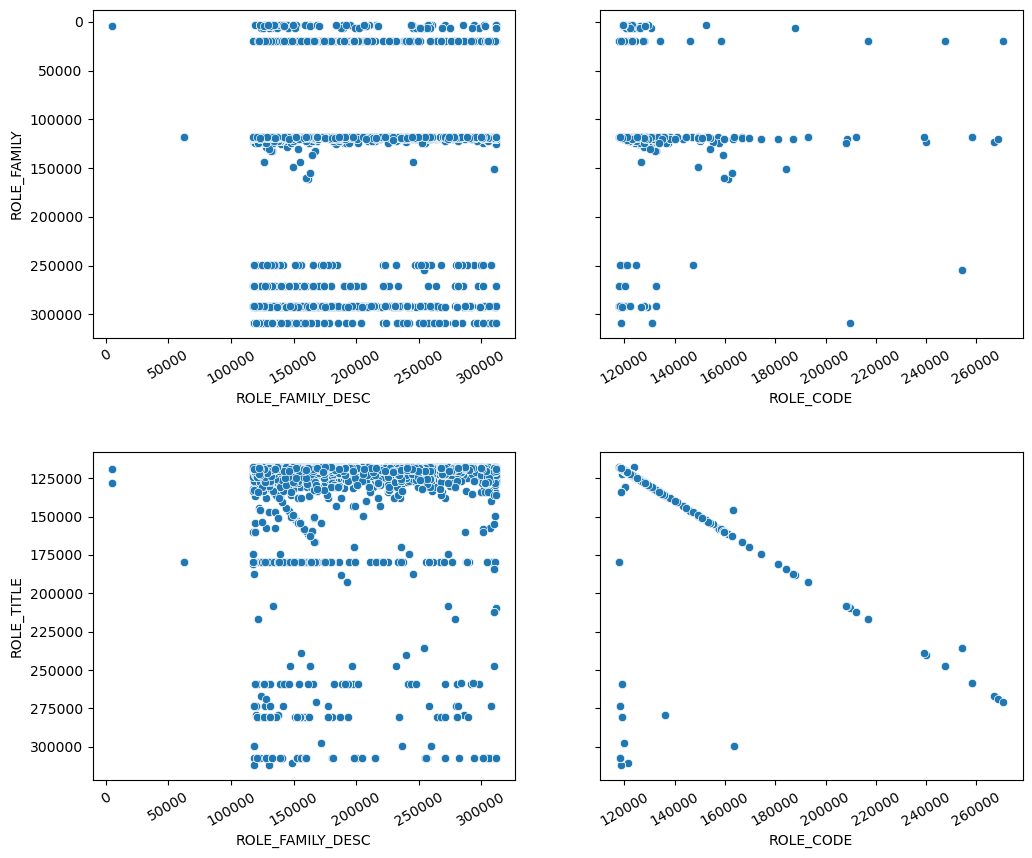

In [15]:
fig, axs = plt.subplots(figsize=(12,10), ncols=2, nrows=2, sharey='row')
features = ['ROLE_FAMILY_DESC', 'ROLE_CODE']
for i, feature in enumerate(features):
    a = sns.scatterplot(x=feature, y='ROLE_FAMILY', data=train_1, ax=axs[0][i])
    b = sns.scatterplot(x=feature, y='ROLE_TITLE', data=train_1, ax=axs[1][i])
    a.set_xticklabels(a.get_xticklabels(), rotation=30)
    b.set_xticklabels(b.get_xticklabels(), rotation=30)
    plt.subplots_adjust(hspace=0.35)

* 관계성이 의심되는 우측 2행의 ['ROLE_TITLE', 'ROLE_CODE'] 그래프가 발견됨,
* 좀 더 면밀한 조사 필요
* 추가 그래프 및 유니크 값 확인

In [16]:
def bar_plot(x, y, figsize=(10,10), columns=5, rows=2,):
    fig, axes = plt.subplots(figsize=figsize, ncols=columns, nrows=rows)

    for n, i in enumerate(train_features):
        x_axis = n%2
        y_axis = n%5
        bins = int(len(train[i])/1000)
        axes[y_axis, x_axis].hist(train[i], bins = bins)
        axes[y_axis, x_axis].set_title(i)
        axes[y_axis, x_axis].tick_params(axis='x', labelsize=11, labelrotation = 25)
        
    action = train['ACTION'].value_counts() 
    axes[4, 1].bar(action.index.astype('str'), action.values)
    axes[4, 1].set_title('ACTION')

    plt.show()


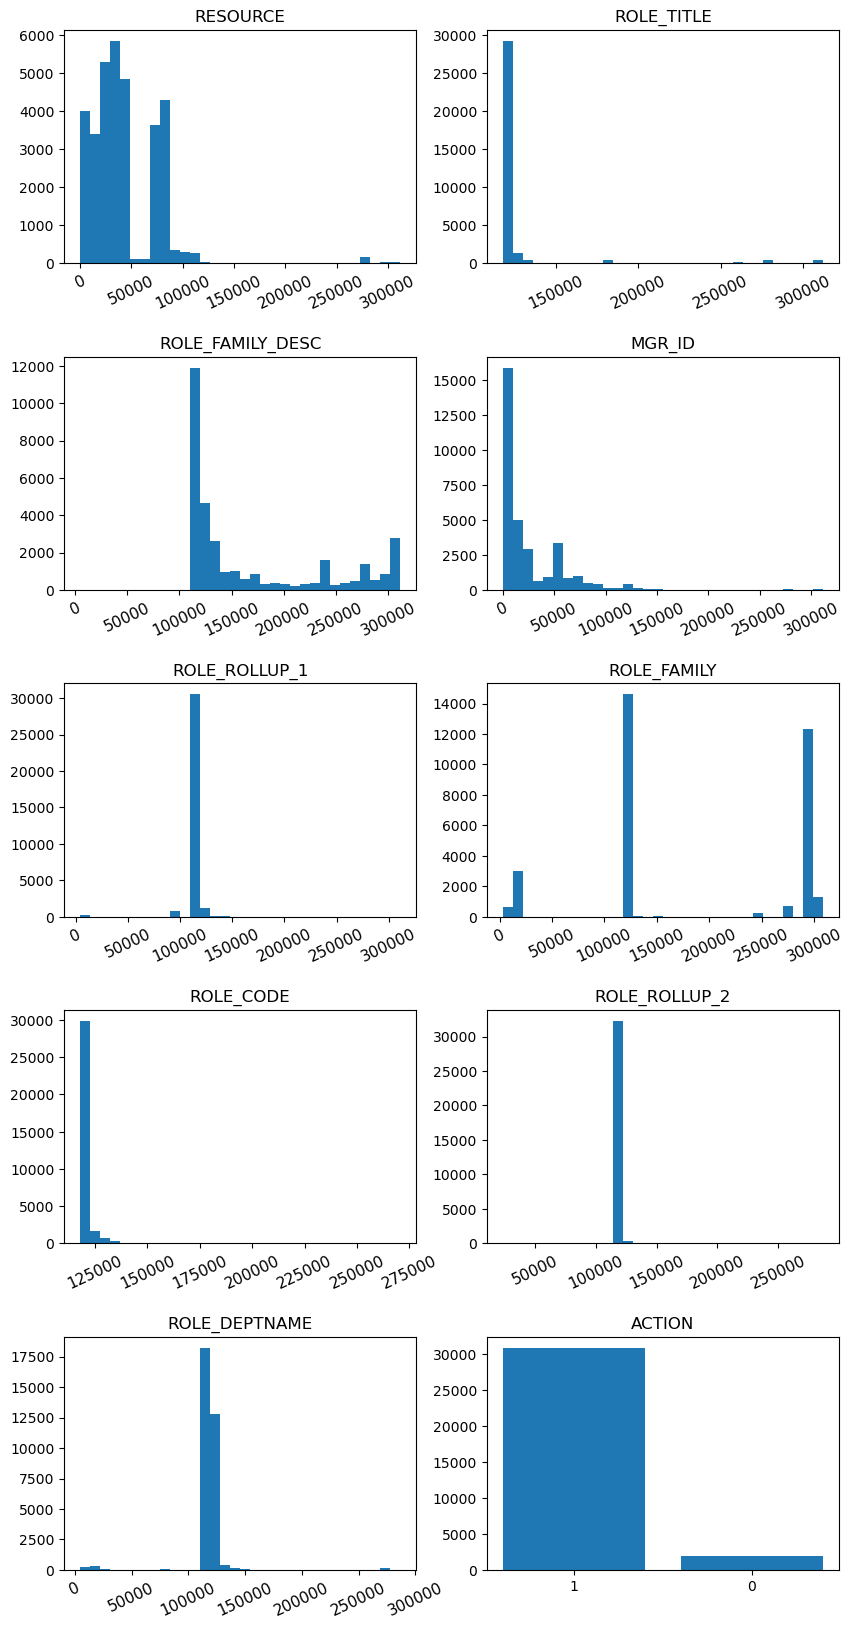

In [17]:
# for checking how train_columns has distributed each values
fig, axes = plt.subplots(figsize=(10,20), ncols=2, nrows=5)
train_features = train.columns[1:]

for n, i in enumerate(train_features):
    x_axis = n%2
    y_axis = n%5
    bins = int(len(train[i])/1000)
    axes[y_axis, x_axis].hist(train[i], bins = bins)
    axes[y_axis, x_axis].set_title(i)
    axes[y_axis, x_axis].tick_params(axis='x', labelsize=11, labelrotation = 25)
    
action = train['ACTION'].value_counts() 
axes[4, 1].bar(action.index.astype('str'), action.values)
axes[4, 1].set_title('ACTION')

plt.subplots_adjust(hspace=0.4)
plt.show()

* ROLE_CODE와 ROLE_FAMILY간 패턴이 매우 유사하고 중복되는 값도 상당하나 완벽히 일치하지는 않기에,
  분류 문제임을 고려하여 삭제하지 않고 진행하기로 결정함